In [45]:
#default imports 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
#settings 
pd.set_option("display.max_columns", None)

In [46]:
#get the data 
df1 = pd.read_csv("../../data/raw/ks-projects-201801.csv")
df2 = pd.read_csv("../../data/raw/ks-projects-201612.csv", encoding='latin-1')

/var/folders/wj/0f08f2_s2zx9x_z0zwt8pkvw0000gn/T/ipykernel_64475/3311525757.py:3: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("../../data/raw/ks-projects-201612.csv", encoding='latin-1')


In [47]:
print(df1.shape)
df1.head()

(378661, 15)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


So we have... "to ignore":
* ID (for now)
* name (is this relevant?)

we have as categorical: 
* category (159)...
* main category (15) --- typo in "journalism", correct
* country (23) --- typo for "N,0"
* currency (14) - looks fine --- does it matter? all numericals are in USD - ah, the goal seems to be in currency. hence the double column. good! 

In [48]:
print(df1['category'].nunique())
display(df1['category'].unique())
print(df1['main_category'].nunique())
display(df1['main_category'].unique())
#go for the country
print(df1['country'].nunique())
display(df1['country'].unique())
#and the currency 
print(df1['currency'].nunique())
display(df1['currency'].unique())
#and finally our target - the state 
print(df1['state'].nunique())
print(df1['state'].unique())

159


array(['Poetry', 'Narrative Film', 'Music', 'Film & Video', 'Restaurants',
       'Food', 'Drinks', 'Product Design', 'Documentary', 'Nonfiction',
       'Indie Rock', 'Crafts', 'Games', 'Tabletop Games', 'Design',
       'Comic Books', 'Art Books', 'Fashion', 'Childrenswear', 'Theater',
       'Comics', 'DIY', 'Webseries', 'Animation', 'Food Trucks',
       'Public Art', 'Illustration', 'Photography', 'Pop', 'People',
       'Art', 'Family', 'Fiction', 'Accessories', 'Rock', 'Hardware',
       'Software', 'Weaving', 'Gadgets', 'Web', 'Jazz', 'Ready-to-wear',
       'Festivals', 'Video Games', 'Anthologies', 'Publishing', 'Shorts',
       'Electronic Music', 'Radio & Podcasts', 'Apps', 'Cookbooks',
       'Apparel', 'Metal', 'Comedy', 'Hip-Hop', 'Periodicals', 'Dance',
       'Technology', 'Painting', 'World Music', 'Photobooks', 'Drama',
       'Architecture', 'Young Adult', 'Latin', 'Mobile Games', 'Flight',
       'Fine Art', 'Action', 'Playing Cards', 'Makerspaces', 'Punk',
       

15


array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

23


array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'N,0"',
       'SE', 'FR', 'NL', 'NZ', 'CH', 'AT', 'DK', 'BE', 'HK', 'LU', 'SG',
       'JP'], dtype=object)

14


array(['GBP', 'USD', 'CAD', 'AUD', 'NOK', 'EUR', 'MXN', 'SEK', 'NZD',
       'CHF', 'DKK', 'HKD', 'SGD', 'JPY'], dtype=object)

6
['failed' 'canceled' 'successful' 'live' 'undefined' 'suspended']


### first view "target"
it might make sense to predict individual outcomes in different ways. 

Like - having the target be "successful" and basically everything else COULD work 

however, looking into it a bit deeper would also be helpful. What does "live" mean? 

We have as duration
* launched (str) --- convert to datetime
* deadline (str) --- convert to datetime

As true numericals: 
* goal (BUT as it's in CURRENCY maybe drop that)
* pledged (same - probably in currency?)
* usd pledged 
* usd_pledged_real --- how are these two not the same? 
* usd_goal_real - what was wanted 
and finally 
* backers (number )

In [49]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,378661.0,1.074731e+09,6.190862e+08,5971.00,5.382635e+08,1.075276e+09,1.610149e+09,2.147476e+09
goal,378661.0,4.908079e+04,1.183391e+06,0.01,2.000000e+03,5.200000e+03,1.600000e+04,1.000000e+08
pledged,378661.0,9.682979e+03,9.563601e+04,0.00,3.000000e+01,6.200000e+02,4.076000e+03,2.033899e+07
backers,378661.0,1.056175e+02,9.071850e+02,0.00,2.000000e+00,1.200000e+01,5.600000e+01,2.193820e+05
usd pledged,374864.0,7.036729e+03,7.863975e+04,0.00,1.698000e+01,3.947200e+02,3.034090e+03,2.033899e+07
usd_pledged_real,378661.0,9.058924e+03,9.097334e+04,0.00,3.100000e+01,6.243300e+02,4.050000e+03,2.033899e+07
usd_goal_real,378661.0,4.545440e+04,1.152950e+06,0.01,2.000000e+03,5.500000e+03,1.550000e+04,1.663614e+08


### Check for Null values

In [50]:
df1.duplicated().value_counts

<bound method IndexOpsMixin.value_counts of 0         False
1         False
2         False
3         False
4         False
          ...  
378656    False
378657    False
378658    False
378659    False
378660    False
Length: 378661, dtype: bool>

In [51]:
df1.isna().sum()
#ok so some have no name - doesn't matter 
#and only usd_pledged has null, but not "pledged_real" so maybe just ignore the pledged one... 

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

### preliminary cleanup

In [52]:
df1['deadline'] = pd.to_datetime(df1.deadline, format='%Y-%m-%d')
df1['launched'] = pd.to_datetime(df1.launched, format='%Y-%m-%d %H:%M:%S')
#df1.info()
df1.head(20)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


Some ideas for new features: 
* duration (if between launched and deadline) - vs. "still running...?"
* consolidate "state" into three - successful, unsuccessful, undefined 
* --- then we could work with two and drop "undefined" for now 
then ... 
* (DONE) Outliers cleaning for backers at 100.000 (cutoff) - there's not that many - ok let's take 80.000
* 

### small checkout

<Axes: xlabel='state', ylabel='Count'>

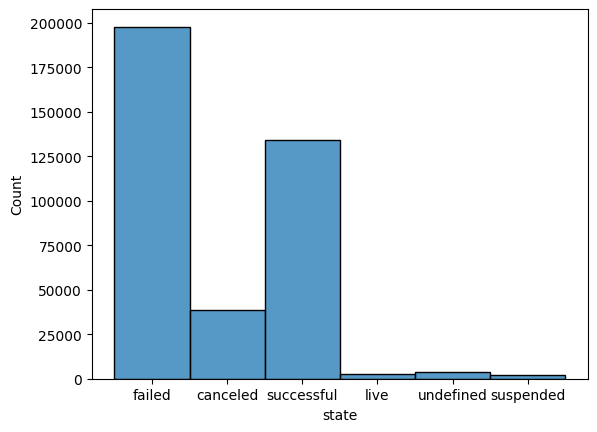

In [10]:
#sns.catplot(data=df1.sort_values("state"), x='state', y=)
sns.histplot(data=df1['state'], bins = 200)

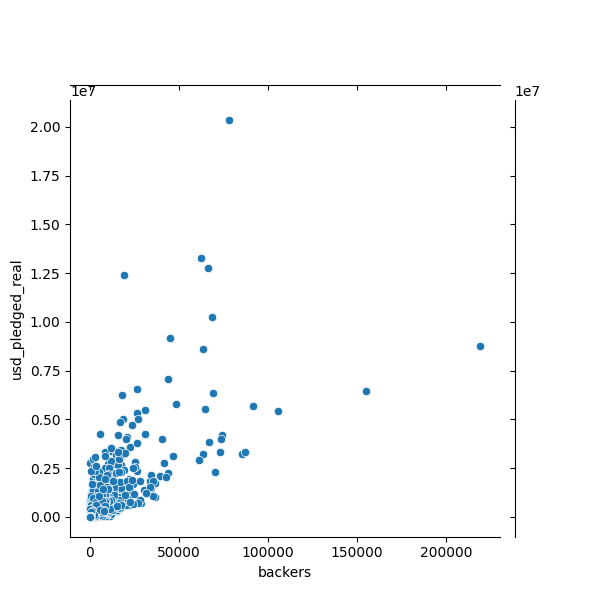

In [ ]:
sns.jointplot(data=df1, x='backers', y='usd_pledged_real')
#so far so obvious

In [ ]:
#sns.boxplot(data=df1['backers'])
#ah, so that's up 
#sns.catplot(data=df1.query('backers > 0'), x='backers', y='usd_pledged_real')
#what's with this column..? 
df1['backers'].describe()
#I'd cut at 100.000 or else ... 

count    378661.000000
mean        105.617476
std         907.185035
min           0.000000
25%           2.000000
50%          12.000000
75%          56.000000
max      219382.000000
Name: backers, dtype: float64

<Axes: ylabel='Frequency'>

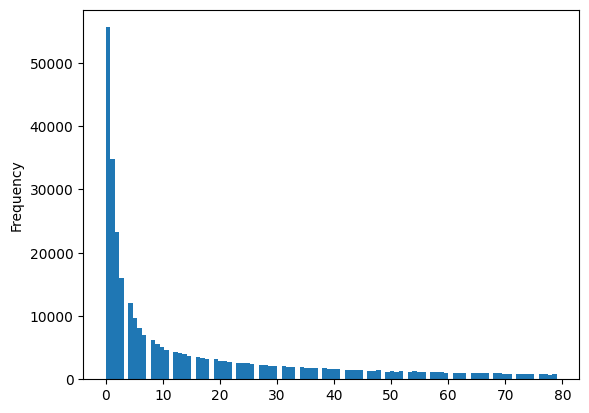

In [ ]:
# dftry = df1.query('backers > 100')
# display(df1.shape)
# dftry.shape
df1_test = df1.query("backers < 80.000")
df1_test['backers'].plot(kind='hist', bins=100)
#there you go - better ... clearest power law ever ... 

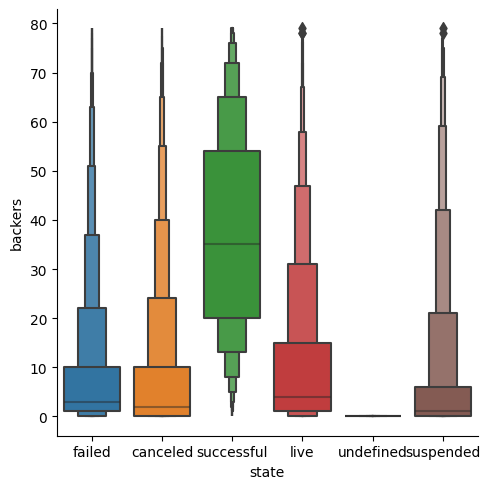

In [21]:
#df1_test['usd_goal_real'].plot(kind='box')
#ya think... 
sns.catplot(data=df1_test, x="state", y="backers", kind="boxen")
#ah! now we're talking!

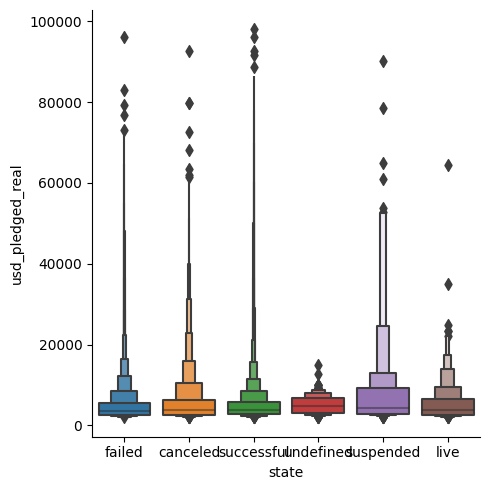

In [72]:
df1_test['usd_pledged_real'].sort_values().tail(30)
df1_test2 = df1_test.query('usd_pledged_real < 100000 & usd_pledged_real > 2000')
sns.catplot(data=df1_test2, x="state", y="usd_pledged_real", kind="boxen")
#ok another one of these pure power laws... 
# we reach a "normal" view around 10.000 - so I'd go for bins 
#ah but do you see the suspended...?

0.01


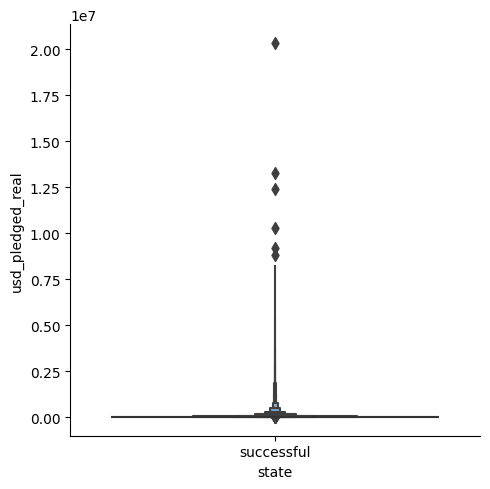

In [ ]:
df1_test['usd_goal_real'].max() #wait, that can't be... 166361390.71 ??? thats hundreds of millions
print(df1_test['usd_goal_real'].min())
#let's do this differently 
df1_testsuccess = df1.query('state == "successful"')
df1_testsuccess['usd_goal_real'].sort_values().tail(30) #so much better - there's the line at 1.000.000 though - and it goes down rapidly, 775000 is right behind it... 
df1_test3 = df1_testsuccess.query('usd_goal_real < 700000 & usd_goal_real > 2000')
sns.catplot(data=df1_test2, x="state", y="usd_pledged_real", kind="boxen") #oh dear... it's worse than I thought 

main_category
Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

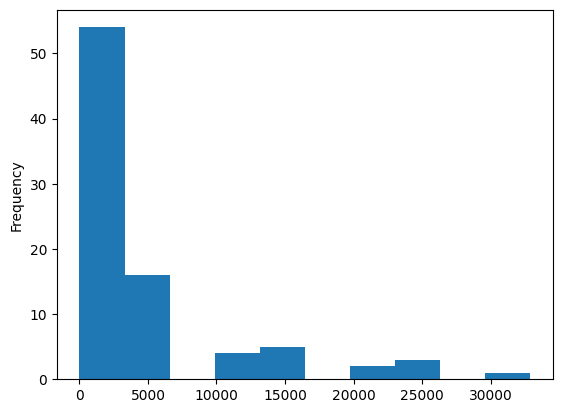

In [64]:
#let's look at the main categories for a sec 
#sns.catplot(data=df1, x=df1['main_category'].value_counts(), y=df1['state'].value_counts(), kind='bar')
display(df1['main_category'].value_counts())
df1.groupby('main_category')['state'].value_counts().plot(kind='hist') #not helping yet ;) 

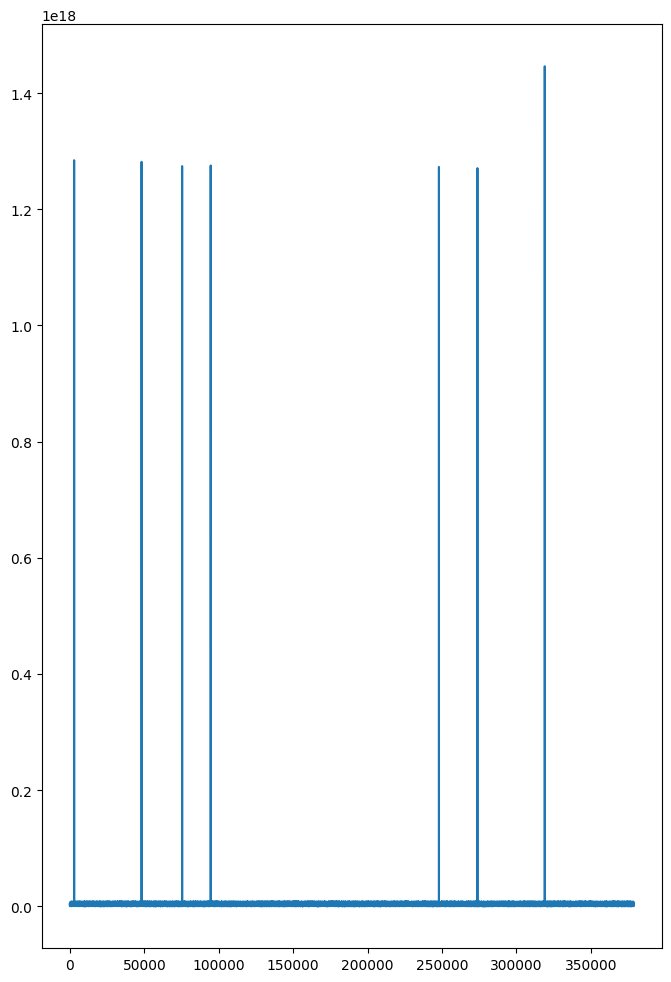

In [70]:
df1['duration'] = df1['deadline'] - df1['launched']
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(8, 12))
ax.plot(df1['duration'])
ax.format_xdata = mdates.DateFormatter('%d')
plt.show()

## Final decision what to do

| Column | Cleanup operation | Comment |
|:--------:|:--------:|:--------:|
|  Row 1   |  Row 1   |  Row 1   |
|  Row 2   |  Row 2   |  Row 2   |
|  Row 3   |  Row 3   |  Row 3   |